In [352]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import random as random

In [353]:
def euclidean(point, data):
    return np.sqrt(np.sum((point - data)**2))

In [354]:
class kMeans:
  def __init__(self, n_samples,n_centroids):
    self.n_samples = n_samples
    self.n_centroids = n_centroids

  def plot(self,X):
    plot = plt.scatter(X[:,0],X[:,1])
    return plot

  def defineInitialCentroids(self):
    initial_centroids = np.random.randint(0,self.n_samples,self.n_centroids)
    return initial_centroids

  def plot_centroids(self,X,centroids):
    centroidPlot = plt.scatter(X[:,0],X[:,1])
    for i in range(len(centroids)):
      index = centroids[i]
      plt.plot(X[index,0], X[index,1], marker='X',color='red')
    plt.show()


  def assign_to_centroid(self, X, centroids):
    collection_points_per_cluster = [[] for _ in range(self.n_centroids)]
    assign_centroid = np.zeros(self.n_samples)
    # print(assign_centroid)
    j_hist = np.zeros(shape=(self.n_samples,self.n_centroids))
    # Assign to centroid
    for i in range(self.n_samples):
      data = np.array((X[i,0], X[i,1]))
      for j in range(self.n_centroids):
        j_centroid = centroids[j]
        point = np.array((X[j_centroid,0], X[j_centroid,1]))
        dist = euclidean(data,point)
        j_hist[i,j] = dist
      assign_centroid[i] = j_hist[i].argmin()
      collection_points_per_cluster[j_hist[i].argmin()].append(data)

    return assign_centroid,j_hist, collection_points_per_cluster

  def plotPointsWithCentroid(self, X, centroids, assign_centroid,j_hist,collection_points_per_cluster):
    collection_points_per_cluster = np.array([np.array(sublist) for sublist in collection_points_per_cluster], dtype=object)
    plot = plt
    for i in range(self.n_centroids):
      index = centroids[i]
      plot.plot(X[index,0], X[index,1], marker='X',color='red')

    for i in range(self.n_samples):
      x = X[i,0]
      y = X[i,1]
      if(assign_centroid[i] == 0):
        plot.scatter(x,y, color='black', label='0')
      elif(assign_centroid[i] == 1):
        plot.scatter(x,y, color='yellow', label='1')
      elif(assign_centroid[i] == 2):
        plot.scatter(x,y, color='blue', label='2')

    return plot

  def find_cluster_mean(self,X,collection_points_per_cluster):
    cluster_means = np.zeros(shape=(self.n_centroids, 2))

    for i in range(self.n_centroids):
      x_sum = 0
      y_sum = 0
      n = 0
      points = collection_points_per_cluster[i]
      for j in range(len(points)):
        x_y = collection_points_per_cluster[i][j]
        x_sum += x_y[0]
        y_sum += x_y[1]
        n += 1
      x_mean = x_sum / n
      y_mean = y_sum / n
      cluster_means[i,0] = x_mean
      cluster_means[i,1] = y_mean
    return cluster_means


  def plot_cluster_mean(self,X,cluster_mean):
    plot = plt
    plot.scatter(cluster_mean[:,0], cluster_mean[:,1], marker='x', color='red')
    plot.scatter(X[:,0], X[:,1])
    return plot


  def find_closets_centroid(self,X):
    euclidean_hist = np.zeros(shape=(3,self.n_samples))
    new_centroids = np.zeros(shape=(self.n_centroids,2))
    new_centroid_index = np.zeros(3)
    for i in range(len(cluster_mean)):
      point = cluster_mean[i]
      for j in range(self.n_samples):
        data = np.array((X[j,0],X[j,1]))
        euclidean_hist[i,j] = euclidean(data,point)
      new_index = euclidean_hist[i].argmin()
      new_centroid_index[i] = new_index
      new_centroid_index = new_centroid_index.astype(int)

      new_centroids[i] = np.array((X[new_index,0], X[new_index,1]))
    return new_centroids,new_centroid_index


  def find_closets_centroid(self,X, cluster_mean):
    euclidean_hist = np.zeros(shape=(self.n_centroids,self.n_samples))
    new_centroids = np.zeros(shape=(self.n_centroids,2))
    new_centroid_index = np.zeros(3)
    for i in range(len(cluster_mean)):
      point = cluster_mean[i]
      for j in range(self.n_samples):
        data = np.array((X[j,0],X[j,1]))
        euclidean_hist[i,j] = euclidean(data,point)
      new_index = euclidean_hist[i].argmin()
      new_centroid_index[i] = new_index
      new_centroid_index = new_centroid_index.astype(int)
      new_centroids[i] = np.array((X[new_index,0], X[new_index,1]))
    return new_centroids,new_centroid_index

In [334]:
test1 = kMeans(25,3)

In [ ]:
test1.plot(X)

In [336]:
intial_centroids = test1.defineInitialCentroids()
intial_centroids

array([3, 6, 1])

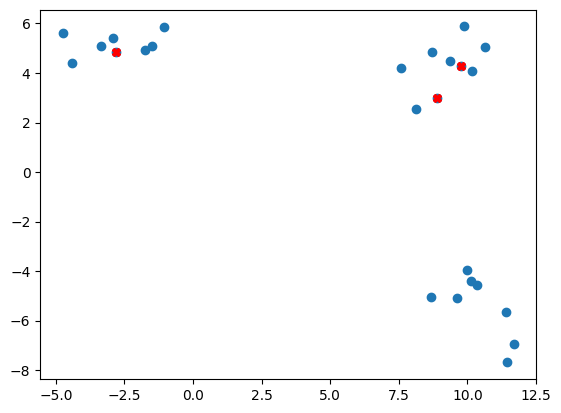

In [337]:
test1.plot_centroids(X,intial_centroids)

In [338]:
assign_centroid,j_hist,collection_points_per_cluster  = test1.assign_to_centroid(X, intial_centroids)

test1.plotPointsWithCentroid(X,intial_centroids, assign_centroid,j_hist,collection_points_per_cluster)

TypeError: euclidean() missing 1 required positional argument: 'data'

In [ ]:
cluster_mean = test1.find_cluster_mean(X,collection_points_per_cluster)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

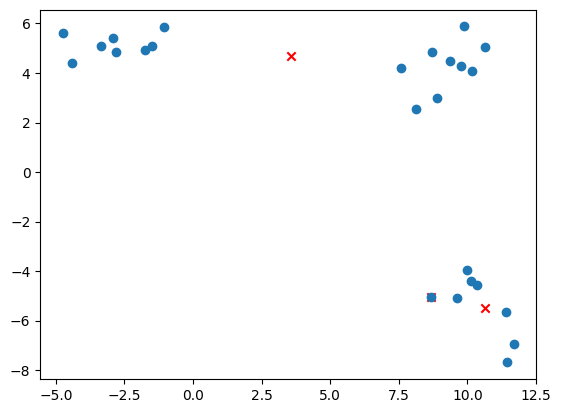

In [339]:
test1.plot_cluster_mean(X,cluster_mean)

In [340]:
new_centroids, new_centroid_index  = test1.find_closets_centroid(X, cluster_mean)

AttributeError: 'kMeans' object has no attribute 'euclidean'

In [341]:
assign_centroid,j_hist, collection_points_per_cluster = test1.assign_to_centroid(X,new_centroid_index)

TypeError: euclidean() missing 1 required positional argument: 'data'

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

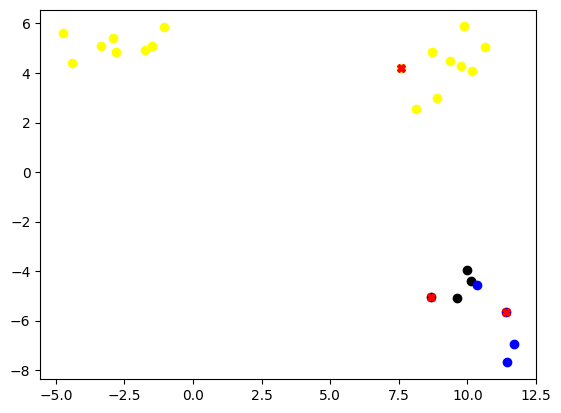

In [342]:
test1.plotPointsWithCentroid(X,new_centroid_index, assign_centroid,j_hist,collection_points_per_cluster)

In [361]:
class kMeans:
  def __init__(self, n_clusters,max_iter=300):
    self.n_clusters = n_clusters
    self.max_iter = max_iter

  def fit(self,X_train):
    # Initialize the centroids by randomly choosing the points
    self.centroids = np.random.randint(0,len(X_train),self.n_clusters)

    # Use Eucledian distance to then train the data
    collection_points_per_cluster = [[] for _ in range(self.n_clusters)]
    assign_centroid = np.zeros(len(X_train))
    j_hist = np.zeros(shape=(len(X_train),self.n_clusters))
    # Assign to centroid
    for i in range(len(X_train)):
      data = np.array((X_train[i,0], X_train[i,1]))
      for j in range(self.n_clusters):
        j_centroid = self.centroids[j]
        point = np.array((X_train[j_centroid,0], X_train[j_centroid,1]))
        dist = euclidean(data,point)
        j_hist[i,j] = dist
      assign_centroid[i] = j_hist[i].argmin()
      collection_points_per_cluster[j_hist[i].argmin()].append(data)

    return assign_centroid,j_hist, collection_points_per_cluster

  def plotPointsWithCentroid(self, X, centroids, assign_centroid,j_hist,collection_points_per_cluster):
    collection_points_per_cluster = np.array([np.array(sublist) for sublist in collection_points_per_cluster], dtype=object)
    plot = plt
    for i in range(self.n_centroids):
      index = centroids[i]
      plot.plot(X[index,0], X[index,1], marker='X',color='red')

    for i in range(self.n_samples):
      x = X[i,0]
      y = X[i,1]
      if(assign_centroid[i] == 0):
        plot.scatter(x,y, color='black', label='0')
      elif(assign_centroid[i] == 1):
        plot.scatter(x,y, color='yellow', label='1')
      elif(assign_centroid[i] == 2):
        plot.scatter(x,y, color='blue', label='2')

    return plot

  def find_cluster_mean(self,X,collection_points_per_cluster):
    cluster_means = np.zeros(shape=(self.n_centroids, 2))

    for i in range(self.n_centroids):
      x_sum = 0
      y_sum = 0
      n = 0
      points = collection_points_per_cluster[i]
      for j in range(len(points)):
        x_y = collection_points_per_cluster[i][j]
        x_sum += x_y[0]
        y_sum += x_y[1]
        n += 1
      x_mean = x_sum / n
      y_mean = y_sum / n
      cluster_means[i,0] = x_mean
      cluster_means[i,1] = y_mean
    return cluster_means


  def plot_cluster_mean(self,X,cluster_mean):
    plot = plt
    plot.scatter(cluster_mean[:,0], cluster_mean[:,1], marker='x', color='red')
    plot.scatter(X[:,0], X[:,1])
    return plot


  def find_closets_centroid(self,X):
    euclidean_hist = np.zeros(shape=(3,self.n_samples))
    new_centroids = np.zeros(shape=(self.n_centroids,2))
    new_centroid_index = np.zeros(3)
    for i in range(len(cluster_mean)):
      point = cluster_mean[i]
      for j in range(self.n_samples):
        data = np.array((X[j,0],X[j,1]))
        euclidean_hist[i,j] = euclidean(data,point)
      new_index = euclidean_hist[i].argmin()
      new_centroid_index[i] = new_index
      new_centroid_index = new_centroid_index.astype(int)

      new_centroids[i] = np.array((X[new_index,0], X[new_index,1]))
    return new_centroids,new_centroid_index


  def find_closets_centroid(self,X, cluster_mean):
    euclidean_hist = np.zeros(shape=(self.n_centroids,self.n_samples))
    new_centroids = np.zeros(shape=(self.n_centroids,2))
    new_centroid_index = np.zeros(3)
    for i in range(len(cluster_mean)):
      point = cluster_mean[i]
      for j in range(self.n_samples):
        data = np.array((X[j,0],X[j,1]))
        euclidean_hist[i,j] = euclidean(data,point)
      new_index = euclidean_hist[i].argmin()
      new_centroid_index[i] = new_index
      new_centroid_index = new_centroid_index.astype(int)
      new_centroids[i] = np.array((X[new_index,0], X[new_index,1]))
    return new_centroids,new_centroid_index


  def plot(self,X):
    plot = plt.scatter(X[:,0],X[:,1])
    return plot


  def plot_centroids(self,X,centroids):
    centroidPlot = plt.scatter(X[:,0],X[:,1])
    for i in range(len(centroids)):
      index = centroids[i]
      plt.plot(X[index,0], X[index,1], marker='X',color='red')
    plt.show()


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

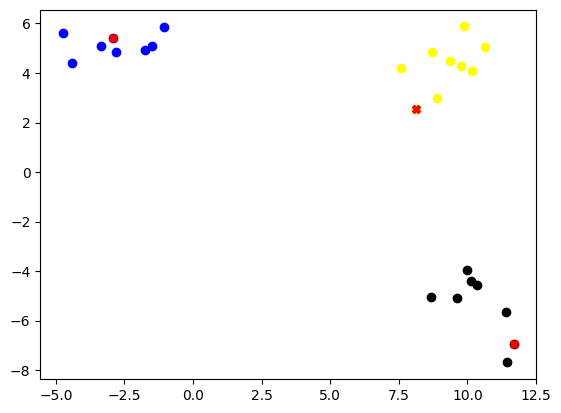

In [359]:
n_samples = 25
n_centroids = 3
X,y = make_blobs(n_samples = n_samples,n_features = 2,centers = n_centroids,random_state = 24)

testLoop = kMeans(n_samples,n_centroids)

#Find random centroids
intial_centroids = testLoop.defineInitialCentroids()
intial_centroids


for i in range(100):
  # Assign using the initial random centroids
  assign_centroid,j_hist,collection_points_per_cluster  = testLoop.assign_to_centroid(X, intial_centroids)
  cluster_mean = testLoop.find_cluster_mean(X,collection_points_per_cluster)
  new_centroids, new_centroid_index  = testLoop.find_closets_centroid(X, cluster_mean)
  assign_centroid,j_hist, collection_points_per_cluster = testLoop.assign_to_centroid(X,new_centroid_index)

test1.plotPointsWithCentroid(X,new_centroid_index, assign_centroid,j_hist,collection_points_per_cluster)